<a href="https://colab.research.google.com/github/MurtazaMister/ML/blob/master/ML_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Q1,Q2
a = np.array([[1,2,3,4,5],
              [5,4,3,2,1],
              [3,2,1,4,5],
              [3,4,5,2,1]])
b = np.array([[1,2,3,4],
              [5,4,3,2],
              [3,2,1,4],
              [3,4,5,2],
              [4,2,1,3]])

# Q3
print(a.dot(b))

# Q4
print(np.multiply(a,b.T))

# Q5
print(np.mean(a))
print(np.median(a))

# Q6
print(a.T)
print(a.dot(b))
print(np.linalg.det(a.dot(b)))

# Q7
print(a[:,1])

[[52 42 37 43]
 [44 42 41 47]
 [48 42 41 43]
 [48 42 37 47]]
[[ 1 10  9 12 20]
 [10 16  6  8  2]
 [ 9  6  1 20  5]
 [12  8 20  4  3]]
3.0
3.0
[[1 5 3 3]
 [2 4 2 4]
 [3 3 1 5]
 [4 2 4 2]
 [5 1 5 1]]
[[52 42 37 43]
 [44 42 41 47]
 [48 42 41 43]
 [48 42 37 47]]
1.9099388737231554e-11
[2 4 2 4]


In [ ]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

nltk.download('twitter_samples')

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

print('Number of positive tweets: ', len('all_positive_tweets'))
print('Number of negative tweets: ', len('all_negative_tweets'))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


Number of positive tweets:  19
Number of negative tweets:  19

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


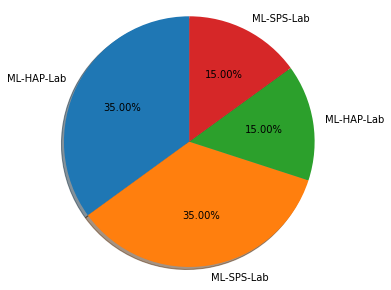

In [ ]:
# Declaring a figure with a custom size
fig = plt.figure(figsize=(5,5))

# labels for the classes
labels = 'ML-HAP-Lab', 'ML-SPS-Lab', 'ML-HAP-Lab', 'ML-SPS-Lab'

# Sizes for each slide
sizes = [35, 35, 15, 15]

plt.pie(sizes, labels=labels, autopct='%.2f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

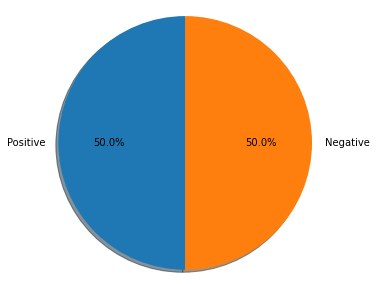

In [ ]:
fig = plt.figure(figsize=(5,5))

labels = 'Positive', 'Negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

In [ ]:
print('\033[92m'+all_positive_tweets[random.randint(0,len(all_positive_tweets))])
print('\033[91m'+all_negative_tweets[random.randint(0,len(all_negative_tweets))])

@clivewalker near enough to Dartmoor :)
@ikebukuroh deantd :-( #justgotkanekified


###Sentiment Analysis

In [ ]:
# We have our tweets data already
# Now lets download some stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re # library for regular Expression
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [ ]:
tweet = all_positive_tweets[random.randint(0,len(all_positive_tweets))]
print('\033[92m'+tweet)
print('\033[93m')

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet);

# remove hashtags
# only removing the hash sign from the word
tweet2 = re.sub(r'#','',tweet2)

print(tweet2)

@OriofAshes @CityofAshes you guys were great last night :) http://t.co/3s3XF5q21N

@OriofAshes @CityofAshes you guys were great last night :) 


In [ ]:
# tokenize the tweets

print()
print('\033[92m',tweet2)
print('\033[93m')

tokenizer = TweetTokenizer(preserve_case=False)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string: ')
print(tweet_tokens)


 @OriofAshes @CityofAshes you guys were great last night :) 


Tokenized string: 
['@oriofashes', '@cityofashes', 'you', 'guys', 'were', 'great', 'last', 'night', ':)']


In [ ]:
# Remove stopwords

stopwords_english = stopwords.words('english')

print(stopwords_english)

print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens:
  if(word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print(tweets_clean)

['@oriofashes', '@cityofashes', 'you', 'guys', 'were', 'great', 'last', 'night', ':)']
['@oriofashes', '@cityofashes', 'guys', 'great', 'last', 'night', ':)']


In [ ]:
print(tweets_clean)

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

print('stemmed words: ',end='')
print(tweets_stem)

['@oriofashes', '@cityofashes', 'guys', 'great', 'last', 'night', ':)']
stemmed words: ['@oriofash', '@cityofash', 'guy', 'great', 'last', 'night', ':)']


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

print(tweets_clean)

wordnet_lemmatizer = WordNetLemmatizer()

tweets_lem = []
for word in tweets_clean:
  lem_words = wordnet_lemmatizer.lemmatize(word)
  tweets_lem.append(lem_words)

print('lemmatized words: ',end='')
print(tweets_lem)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['@oriofashes', '@cityofashes', 'guys', 'great', 'last', 'night', ':)']
lemmatized words: ['@oriofashes', '@cityofashes', 'guy', 'great', 'last', 'night', ':)']


###Perform preprocessing tasks on any text dataset

In [ ]:
import nltk
from nltk.corpus import movie_reviews
import matplotlib.pyplot as plt
import random

In [ ]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
import os

pos_path = f'../root/nltk_data/corpora/movie_reviews/pos'
neg_path = f'../root/nltk_data/corpora/movie_reviews/neg'

pos_review = []
neg_review = []

pos_dir = os.listdir(pos_path)
neg_dir = os.listdir(neg_path)

for file in pos_dir:
  with open(f'{pos_path}/{file}', 'rt') as myfile:
    pos_review.append(myfile.read())

for file in neg_dir:
  with open(f'{neg_path}/{file}', 'rt') as myfile:
    neg_review.append(myfile.read())

print(len(pos_review))
print(len(neg_review))

1000
1000


In [ ]:
# Now we have the data, so we need to preprocess this data like:
  # Tokenizing the string
  # Lowercasing
  # Removing stop words and punctuations
  # Stemming and Lemmatizing

nltk.download('stopwords')

import string # for string operations
from nltk.corpus import stopwords # module for stop words
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
movie_reviews = pos_review + neg_review

sample = movie_reviews[random.randint(0,len(movie_reviews)-1)]

In [ ]:
# Removing any kind of links

sample2 = re.sub(r'https?:\/\/.*[\r\n]*','',sample)
sample2 = re.sub(r'#','',sample2)

print(sample2)

the american action film has been slowly drowning to death in a sea of asian wire-fu copycats . 
it's not a pretty death , and it's leaving the likes of schwartznager , stallone , and van damme wearing cement galoshes at the bottom of a kung fu sea . 
sometimes , the mix results in a mind-blowing spectacle unlike any other . 
quality action with amazing and exciting stunt work , as in 1999's the matrix , can be a real gem . 
but too often hollywood gets it wrong , even when they pay off chinese directors . 
flying ninjas and floating karate masters have been replaced by soaring bronx detectives and slow motion kicking scientists . 
mostly it's laughable . 
in hollywood's rush to emulate the success of the matrix , trademark asian stunt choreography has become more of a joke than an art form . 
but iron monkey , the latest asian import , shows us how to get it right . 
iron monkey ( actually a reissue of a 1993 film ) is the story of a 19th chinese vigilante ( rongguang yu ) , fighting 

In [ ]:
# Tokenizing the review

from nltk.tokenize import word_tokenize
nltk.download('punkt')

sample_tokens = word_tokenize(sample2)
print(sample_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['the', 'american', 'action', 'film', 'has', 'been', 'slowly', 'drowning', 'to', 'death', 'in', 'a', 'sea', 'of', 'asian', 'wire-fu', 'copycats', '.', 'it', "'s", 'not', 'a', 'pretty', 'death', ',', 'and', 'it', "'s", 'leaving', 'the', 'likes', 'of', 'schwartznager', ',', 'stallone', ',', 'and', 'van', 'damme', 'wearing', 'cement', 'galoshes', 'at', 'the', 'bottom', 'of', 'a', 'kung', 'fu', 'sea', '.', 'sometimes', ',', 'the', 'mix', 'results', 'in', 'a', 'mind-blowing', 'spectacle', 'unlike', 'any', 'other', '.', 'quality', 'action', 'with', 'amazing', 'and', 'exciting', 'stunt', 'work', ',', 'as', 'in', '1999', "'s", 'the', 'matrix', ',', 'can', 'be', 'a', 'real', 'gem', '.', 'but', 'too', 'often', 'hollywood', 'gets', 'it', 'wrong', ',', 'even', 'when', 'they', 'pay', 'off', 'chinese', 'directors', '.', 'flying', 'ninjas', 'and', 'floating', 'karate', 'masters', 'have', 'been', 'replaced', 'by', 'soaring', 'bronx', 'detectives', 'and', 'slow', 'motion', 'kicking', 'scientists', '.',

In [ ]:
# Removing stop words and punctuations

stopwords_english = stopwords.words('english')
punctuation_english = string.punctuation

In [ ]:
# Cleaning the review

review_clean = []

for word in sample_tokens:
  if (word not in stopwords_english and word not in punctuation_english):
    review_clean.append(word)

print(review_clean)

['american', 'action', 'film', 'slowly', 'drowning', 'death', 'sea', 'asian', 'wire-fu', 'copycats', "'s", 'pretty', 'death', "'s", 'leaving', 'likes', 'schwartznager', 'stallone', 'van', 'damme', 'wearing', 'cement', 'galoshes', 'bottom', 'kung', 'fu', 'sea', 'sometimes', 'mix', 'results', 'mind-blowing', 'spectacle', 'unlike', 'quality', 'action', 'amazing', 'exciting', 'stunt', 'work', '1999', "'s", 'matrix', 'real', 'gem', 'often', 'hollywood', 'gets', 'wrong', 'even', 'pay', 'chinese', 'directors', 'flying', 'ninjas', 'floating', 'karate', 'masters', 'replaced', 'soaring', 'bronx', 'detectives', 'slow', 'motion', 'kicking', 'scientists', 'mostly', "'s", 'laughable', 'hollywood', "'s", 'rush', 'emulate', 'success', 'matrix', 'trademark', 'asian', 'stunt', 'choreography', 'become', 'joke', 'art', 'form', 'iron', 'monkey', 'latest', 'asian', 'import', 'shows', 'us', 'get', 'right', 'iron', 'monkey', 'actually', 'reissue', '1993', 'film', 'story', '19th', 'chinese', 'vigilante', 'rong

In [ ]:
# Stemming

stemmer = PorterStemmer()

review_stem = []

for word in review_clean:
  stem_word = stemmer.stem(word)
  review_stem.append(stem_word)

print(review_stem)

['american', 'action', 'film', 'slowli', 'drown', 'death', 'sea', 'asian', 'wire-fu', 'copycat', "'s", 'pretti', 'death', "'s", 'leav', 'like', 'schwartznag', 'stallon', 'van', 'damm', 'wear', 'cement', 'galosh', 'bottom', 'kung', 'fu', 'sea', 'sometim', 'mix', 'result', 'mind-blow', 'spectacl', 'unlik', 'qualiti', 'action', 'amaz', 'excit', 'stunt', 'work', '1999', "'s", 'matrix', 'real', 'gem', 'often', 'hollywood', 'get', 'wrong', 'even', 'pay', 'chines', 'director', 'fli', 'ninja', 'float', 'karat', 'master', 'replac', 'soar', 'bronx', 'detect', 'slow', 'motion', 'kick', 'scientist', 'mostli', "'s", 'laughabl', 'hollywood', "'s", 'rush', 'emul', 'success', 'matrix', 'trademark', 'asian', 'stunt', 'choreographi', 'becom', 'joke', 'art', 'form', 'iron', 'monkey', 'latest', 'asian', 'import', 'show', 'us', 'get', 'right', 'iron', 'monkey', 'actual', 'reissu', '1993', 'film', 'stori', '19th', 'chines', 'vigilant', 'rongguang', 'yu', 'fight', 'uniqu', 'style', 'shaolin', 'kung', 'fu', '

In [ ]:
# Lemmatizing

wordnet_lemmatizer = WordNetLemmatizer()

review_lem = []

for word in review_stem:
  lem_word = wordnet_lemmatizer.lemmatize(word)
  review_lem.append(lem_word)

print(review_lem)

['american', 'action', 'film', 'slowli', 'drown', 'death', 'sea', 'asian', 'wire-fu', 'copycat', "'s", 'pretti', 'death', "'s", 'leav', 'like', 'schwartznag', 'stallon', 'van', 'damm', 'wear', 'cement', 'galosh', 'bottom', 'kung', 'fu', 'sea', 'sometim', 'mix', 'result', 'mind-blow', 'spectacl', 'unlik', 'qualiti', 'action', 'amaz', 'excit', 'stunt', 'work', '1999', "'s", 'matrix', 'real', 'gem', 'often', 'hollywood', 'get', 'wrong', 'even', 'pay', 'chine', 'director', 'fli', 'ninja', 'float', 'karat', 'master', 'replac', 'soar', 'bronx', 'detect', 'slow', 'motion', 'kick', 'scientist', 'mostli', "'s", 'laughabl', 'hollywood', "'s", 'rush', 'emul', 'success', 'matrix', 'trademark', 'asian', 'stunt', 'choreographi', 'becom', 'joke', 'art', 'form', 'iron', 'monkey', 'latest', 'asian', 'import', 'show', 'u', 'get', 'right', 'iron', 'monkey', 'actual', 'reissu', '1993', 'film', 'stori', '19th', 'chine', 'vigilant', 'rongguang', 'yu', 'fight', 'uniqu', 'style', 'shaolin', 'kung', 'fu', 'rig

#Pandas Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
# drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/mtcars.csv')
d = pd.crosstab(index=data['cyl'],columns="count",dropna=True)
print(d)

col_0  count
cyl         
4         11
6          7
8         14


In [ ]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
data.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
print("Total null data:",data.sum())

Total null data: Unnamed: 0    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                       642.9
cyl                                                         198
disp                                                     7383.1
hp                                                         4694
drat                                                     115.09
wt                                                      102.952
qsec                                                     571.16
vs                                                           14
am                                                           13
gear                                                        118
carb                                                         90
dtype: object


In [ ]:
print("Total null data:",data.isnull().sum())

Total null data: Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64


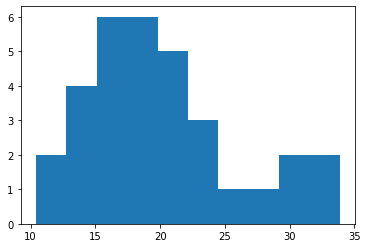

In [ ]:
plt.hist(data['mpg'], bins=10)
plt.show()

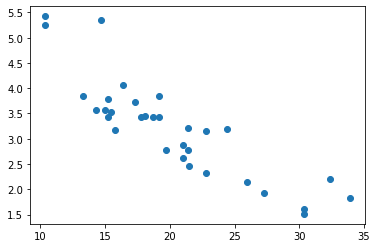

In [ ]:
plt.scatter(data['mpg'],data['wt'])
plt.show()

In [ ]:
df=pd.DataFrame(data,columns=['gear'])
print(df['gear'].value_counts())

3    15
4    12
5     5
Name: gear, dtype: int64


In [ ]:
data.values

array([['Mazda RX4', 21.0, 6, 160.0, 110, 3.9, 2.62, 16.46, 0, 1, 4, 4],
       ['Mazda RX4 Wag', 21.0, 6, 160.0, 110, 3.9, 2.875, 17.02, 0, 1, 4,
        4],
       ['Datsun 710', 22.8, 4, 108.0, 93, 3.85, 2.32, 18.61, 1, 1, 4, 1],
       ['Hornet 4 Drive', 21.4, 6, 258.0, 110, 3.08, 3.215, 19.44, 1, 0,
        3, 1],
       ['Hornet Sportabout', 18.7, 8, 360.0, 175, 3.15, 3.44, 17.02, 0,
        0, 3, 2],
       ['Valiant', 18.1, 6, 225.0, 105, 2.76, 3.46, 20.22, 1, 0, 3, 1],
       ['Duster 360', 14.3, 8, 360.0, 245, 3.21, 3.57, 15.84, 0, 0, 3, 4],
       ['Merc 240D', 24.4, 4, 146.7, 62, 3.69, 3.19, 20.0, 1, 0, 4, 2],
       ['Merc 230', 22.8, 4, 140.8, 95, 3.92, 3.15, 22.9, 1, 0, 4, 2],
       ['Merc 280', 19.2, 6, 167.6, 123, 3.92, 3.44, 18.3, 1, 0, 4, 4],
       ['Merc 280C', 17.8, 6, 167.6, 123, 3.92, 3.44, 18.9, 1, 0, 4, 4],
       ['Merc 450SE', 16.4, 8, 275.8, 180, 3.07, 4.07, 17.4, 0, 0, 3, 3],
       ['Merc 450SL', 17.3, 8, 275.8, 180, 3.07, 3.73, 17.6, 0, 0, 3, 3],
      

In [ ]:
data.loc[5:9,'mpg']

5    18.1
6    14.3
7    24.4
8    22.8
9    19.2
Name: mpg, dtype: float64

In [ ]:
display(data.loc[1:5])

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
display(data.iloc[1:5,2:5])

,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


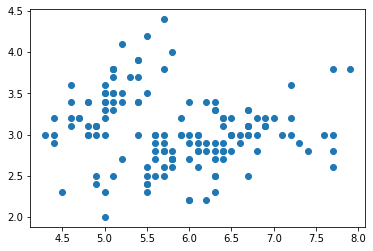

In [ ]:
# 1)Draw Scatter Plot between SepalLengthCm and SepalWidthCm for 
# “Iris.csv” file with proper labelling.

data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.show()

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

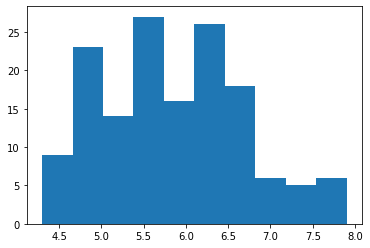

In [ ]:
# 2) Draw Histogram of SepalLengthCm with proper labelling.

plt.hist(data['SepalLengthCm'])

<BarContainer object of 150 artists>

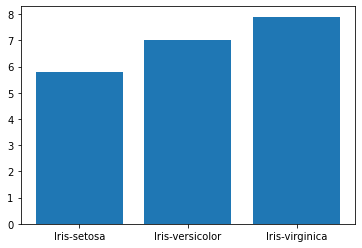

In [ ]:
# 3) Plot bar chart of Species.

plt.bar(data['Species'],data['SepalLengthCm'])

In [ ]:
# 4) Count total null values for each column in this dataset.

print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# 5) i) Print first 5 rows of SepalLengthCm.

display(data['SepalLengthCm'].head())

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLengthCm, dtype: float64

In [ ]:
# 5) ii) Print from 5th row and onwards and entire column
# of Iris.csv dataset.

display(data.iloc[5:,:])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##Scikit Learn

In [ ]:
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = datasets.load_iris()

In [ ]:
x = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:",feature_names)
print("Target names:",target_names)
print("\nFirst 10 ros of X:\n",x[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 ros of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(
    x,y,test_size=0.4, random_state=1
)

##Exercise

Perform the above steps on any other dataset available in Sklearn library

In [ ]:
wine = datasets.load_wine()

In [ ]:
x = wine.data
y = wine.target

feature_names = iris.feature_names

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=1
)